In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#config
inputSize = 5
outputSize = 3
batchSize = 10
testSize = 5
epochs = 400
learningRate = 0.01
seed = 123456

In [3]:
#create functions
#Operator example in forward and backward (Mult)
def forwardMult(A,B):
    return np.matmul(A,B) 

def backwardMult(dC,A,B,dA,dB):
    dA += np.matmul(dC,np.matrix.transpose(B))
    dB += np.matmul(np.matrix.transpose(A),dC)
    
#Loss example in forward and backward (RMSE)
def forwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        loss = np.mean( 0.5*np.square(predictedOutput - realOutput))       
    else :
        print("Shape of arrays not the same")
    return loss

def backwardloss(predictedOutput,realOutput):
    if(predictedOutput.shape == realOutput.shape):
        deltaOutput = (predictedOutput - realOutput)/predictedOutput.size
    else :
        print("Shape of arrays not the same")
    return deltaOutput

#Optimizer example (SGD)
def updateweights(W,dW,learningRate):
    W -= learningRate * dW

In [4]:
#Generation of fake dataset - we generate random inputs and weights and calculate outputs
np.random.seed(seed)
inputArray = np.random.uniform(-5,5,(batchSize,inputSize))
weights = np.random.uniform(-5,5,(inputSize,outputSize))
outputArray = np.matmul(inputArray,weights)
inputTest = np.random.uniform(-5,5,(testSize,inputSize))
outputTest = np.matmul(inputTest,weights)

In [5]:
#initialization of NN by other random weights
nnWeights = np.random.uniform(-3,3,(inputSize,outputSize))
deltaweights = np.zeros((inputSize,outputSize))
deltainput = np.zeros((batchSize,inputSize))
deltaoutput = np.zeros((inputSize,outputSize))

In [6]:
historyTrain=[] #Used to record the history of loss
historyTest=[]
i = 1
while i <= epochs:
    #Forward pass train:
    nnOutput = forwardMult(inputArray,nnWeights)
    lossTrain = forwardloss(nnOutput,outputArray)
    historyTrain.append(lossTrain)
    
    #Forward pass test:
    nnTest = forwardMult(inputTest,nnWeights)
    lossTest = forwardloss(nnTest,outputTest)
    historyTest.append(lossTest)
    #Print Loss every 50 epochs: 
    if(i%10==0):
        print("Epoch: " + str(i) + " Loss (train): " + "{0:.3f}".format(lossTrain) + " Loss (test): " + "{0:.3f}".format(lossTest))
    
    #Backpropagate
    deltaoutput = backwardloss(nnOutput,outputArray)
    backwardMult(deltaoutput,inputArray,nnWeights,deltainput,deltaweights)
    
    #Apply optimizer
    updateweights(nnWeights,deltaweights, learningRate)
    
    #Reset deltas 
    deltainput = np.zeros((batchSize,inputSize))
    deltaweights = np.zeros((inputSize,outputSize))
    deltaoutput = np.zeros((inputSize,outputSize))
    
    #Start new epoch
    i = i+1

Epoch: 10 Loss (train): 139.093 Loss (test): 135.703
Epoch: 20 Loss (train): 72.917 Loss (test): 97.018
Epoch: 30 Loss (train): 42.783 Loss (test): 73.837
Epoch: 40 Loss (train): 27.811 Loss (test): 58.390
Epoch: 50 Loss (train): 19.624 Loss (test): 47.288
Epoch: 60 Loss (train): 14.704 Loss (test): 38.904
Epoch: 70 Loss (train): 11.493 Loss (test): 32.369
Epoch: 80 Loss (train): 9.251 Loss (test): 27.163
Epoch: 90 Loss (train): 7.602 Loss (test): 22.952
Epoch: 100 Loss (train): 6.339 Loss (test): 19.504
Epoch: 110 Loss (train): 5.343 Loss (test): 16.655
Epoch: 120 Loss (train): 4.540 Loss (test): 14.280
Epoch: 130 Loss (train): 3.881 Loss (test): 12.287
Epoch: 140 Loss (train): 3.334 Loss (test): 10.605
Epoch: 150 Loss (train): 2.875 Loss (test): 9.178
Epoch: 160 Loss (train): 2.487 Loss (test): 7.961
Epoch: 170 Loss (train): 2.157 Loss (test): 6.920
Epoch: 180 Loss (train): 1.875 Loss (test): 6.025
Epoch: 190 Loss (train): 1.632 Loss (test): 5.255
Epoch: 200 Loss (train): 1.424 Loss 

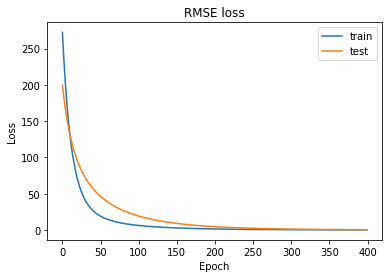

In [7]:
plt.plot(historyTrain)
plt.plot(historyTest)
plt.title('RMSE loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [8]:
weights

array([[-4.00263237,  2.34596222, -4.8345549 ],
       [-0.186155  , -4.04061126, -0.02693667],
       [ 3.38796274,  3.97333257,  2.32591519],
       [ 2.58724364,  0.60657183, -0.28522073],
       [-3.61231882, -4.05538867,  4.42256339]])

In [10]:
#learning weights
nnWeights

array([[-4.04533436,  2.3788998 , -4.87272339],
       [-0.29534094, -3.9852363 , -0.13807301],
       [ 3.16059177,  4.05947631,  2.08047218],
       [ 2.35157153,  0.6917928 , -0.54164365],
       [-3.78222308, -3.98801605,  4.24041106]])